In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime# Get the stock quote

In [14]:
df = yf.download('AAPL', 
                      start='2017-01-01', 
                      end='2022-02-22', 
                      progress=False,
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297695,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267141,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405802,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711329,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965155,134247600


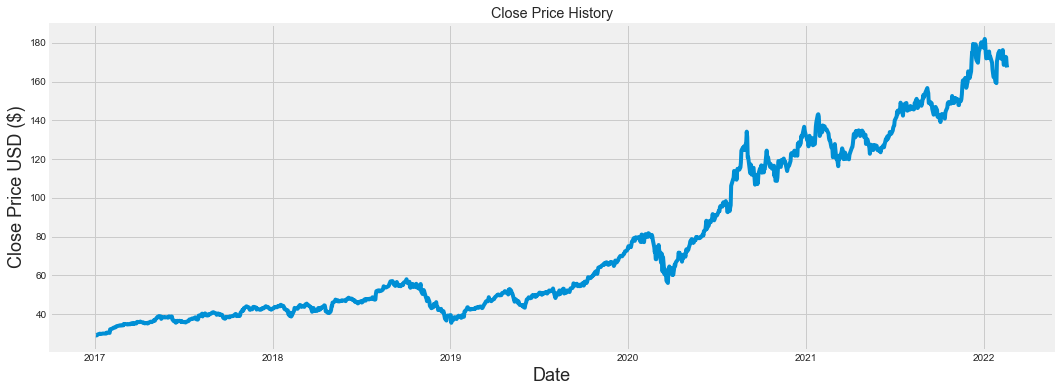

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1035

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.12419344e-04],
       [0.00000000e+00],
       [9.64027295e-04],
       ...,
       [9.38172009e-01],
       [9.14185876e-01],
       [9.03859404e-01]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00021242, 0.        , 0.00096403, 0.00308815, 0.00485278,
       0.00504886, 0.00609458, 0.00527761, 0.00493449, 0.00650306,
       0.00648672, 0.00614359, 0.00650306, 0.00663378, 0.00645405,
       0.00957485, 0.0096729 , 0.00968923, 0.00916637, 0.00870887,
       0.02079998, 0.02044051, 0.02133918, 0.02331623, 0.02534231,
       0.02617561, 0.02679651, 0.02630633, 0.02821803, 0.03104475,
       0.03184536, 0.03158395, 0.0321885 , 0.03378975, 0.03445967,
       0.03351198, 0.0337244 , 0.03416554, 0.0342636 , 0.0388386 ,
       0.03748245, 0.03882227, 0.03810333, 0.03839745, 0.0375478 ,
       0.03702493, 0.03777655, 0.03787458, 0.03753147, 0.03993335,
       0.04030915, 0.0391654 , 0.04156729, 0.0389203 , 0.04150192,
       0.04068495, 0.04022745, 0.0406196 , 0.04539069, 0.04591353])]
[0.0456030797713296]

[array([0.00021242, 0.        , 0.00096403, 0.00308815, 0.00485278,
       0.00504886, 0.00609458, 0.00527761, 0.00493449, 0.00650306,
       0.00648672, 0.00614359, 0.006

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

NotImplementedError: Cannot convert a symbolic Tensor (lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported